In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.feature_selection import mutual_info_classif, f_classif
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA


from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import lightgbm as lgb


# import scipy
# import matplotlib
# import sklearn
# print("seaborn==", sns.__version__)
# print("scikit-learn==", sklearn.__version__)
# print("pandas==", pd.__version__)
# print("numpy==", np.__version__)
# print("matplotlib==", matplotlib.__version__)
# print("scipy==", scipy.__version__)
# print("xgboost==", xgb.__version__)
# print("lightgbm==", lgb.__version__)

Data shape: (2111, 17)
Numerical variables: ['age', 'height', 'weight', 'veggie_per_meal', 'meals_daily', 'water_daily', 'physical_activity', 'technological_devices']
Categorical variables: ['sex', 'family_history', 'often_high_calorie_intake', 'freq_snack', 'smoking', 'monitor_calorie', 'freq_alcohol', 'transport']
Missing values:
 sex                          0
age                          0
height                       0
weight                       0
family_history               0
often_high_calorie_intake    0
veggie_per_meal              0
meals_daily                  0
freq_snack                   0
smoking                      0
water_daily                  0
monitor_calorie              0
physical_activity            0
technological_devices        0
freq_alcohol                 0
transport                    0
bmi_category                 0
dtype: int64

Numerical variables statistics:


,count,mean,std,min,25%,50%,75%,max
age,2111.0,24.312600,6.345968,14.00,19.947192,22.777890,26.000000,61.00
height,2111.0,1.701677,0.093305,1.45,1.630000,1.700499,1.768464,1.98
weight,2111.0,86.586058,26.191172,39.00,65.473343,83.000000,107.430682,173.00
veggie_per_meal,2111.0,2.419043,0.533927,1.00,2.000000,2.385502,3.000000,3.00
meals_daily,2111.0,2.685628,0.778039,1.00,2.658738,3.000000,3.000000,4.00
water_daily,2111.0,2.008011,0.612953,1.00,1.584812,2.000000,2.477420,3.00
physical_activity,2111.0,1.010298,0.850592,0.00,0.124505,1.000000,1.666678,3.00
technological_devices,2111.0,0.657866,0.608927,0.00,0.000000,0.625350,1.000000,2.00



Categorical variables cardinality:
sex: 2
family_history: 2
often_high_calorie_intake: 2
freq_snack: 4
smoking: 2
monitor_calorie: 2
freq_alcohol: 4
transport: 5
bmi_category
Insufficient_Weight    272
Normal_Weight          287
Overweight_Level_I     290
Overweight_Level_II    290
Obesity_Type_I         351
Obesity_Type_II        297
Obesity_Type_III       324
Name: count, dtype: int64


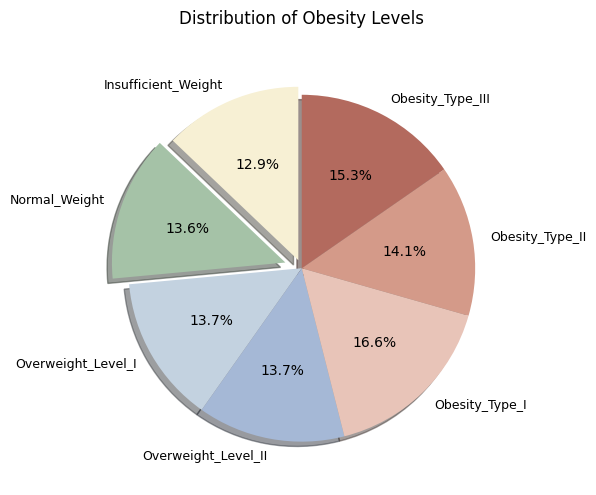

<Figure size 1000x600 with 0 Axes>

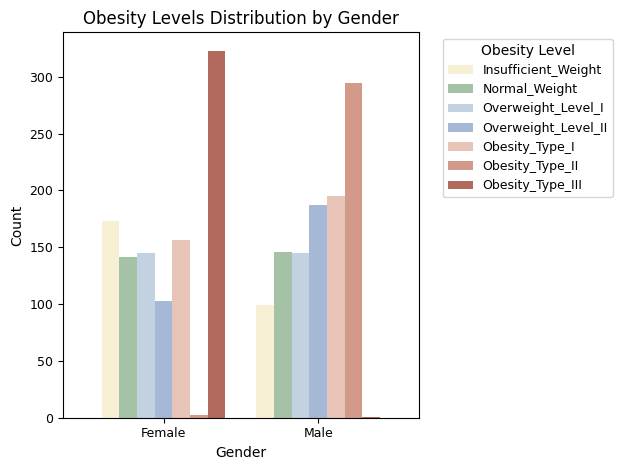

<Figure size 800x600 with 0 Axes>

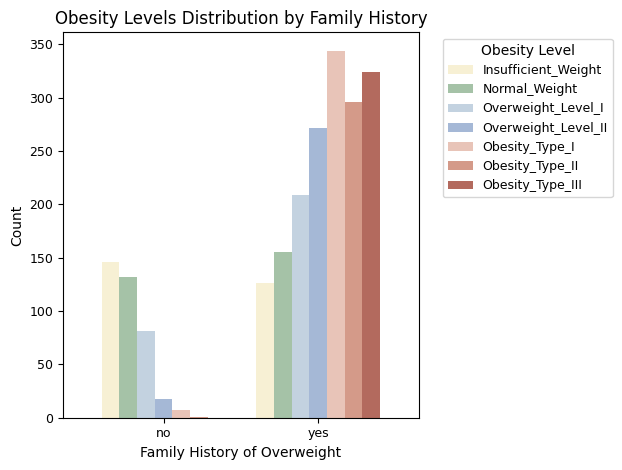

<Figure size 1000x600 with 0 Axes>

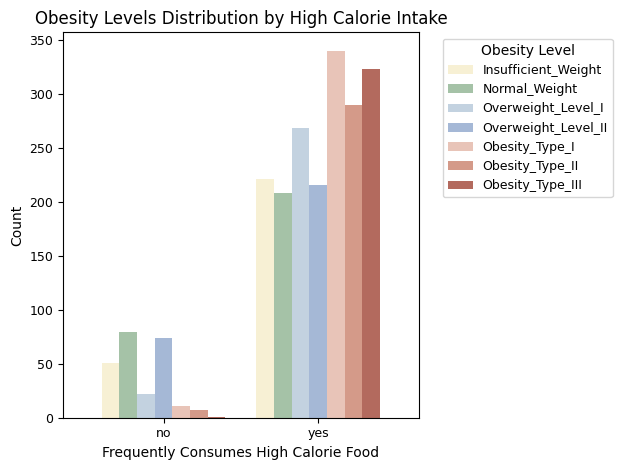

<Figure size 1000x600 with 0 Axes>

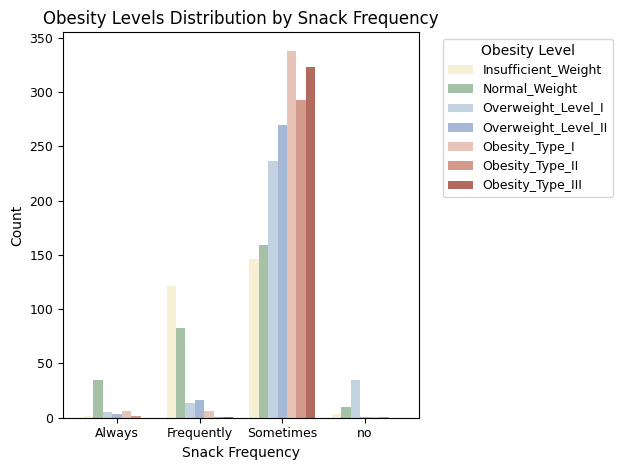

<Figure size 800x600 with 0 Axes>

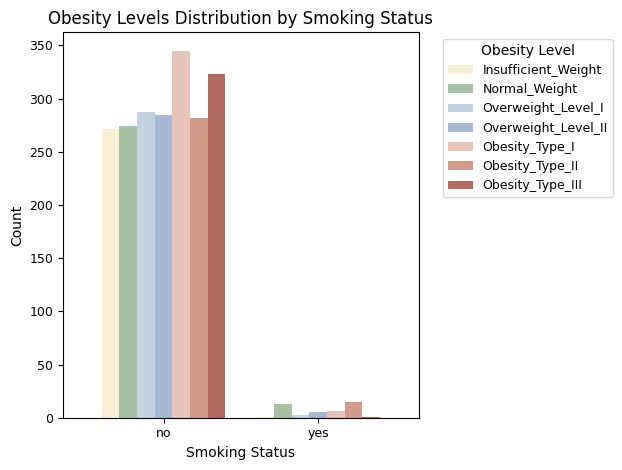

<Figure size 800x600 with 0 Axes>

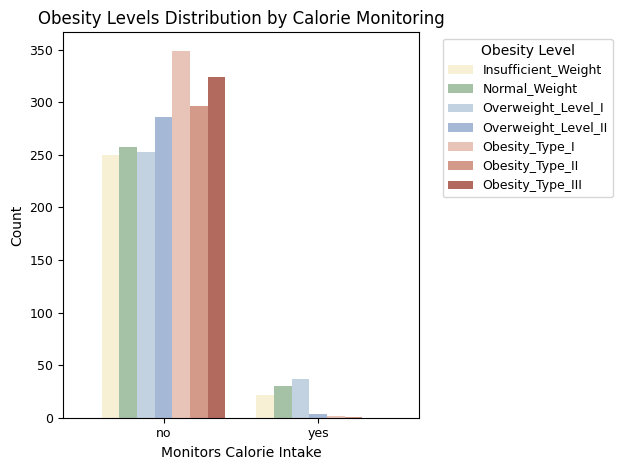

<Figure size 1000x600 with 0 Axes>

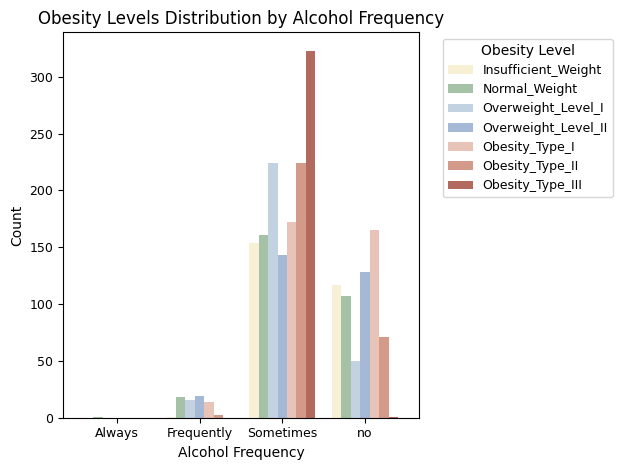

<Figure size 1000x600 with 0 Axes>

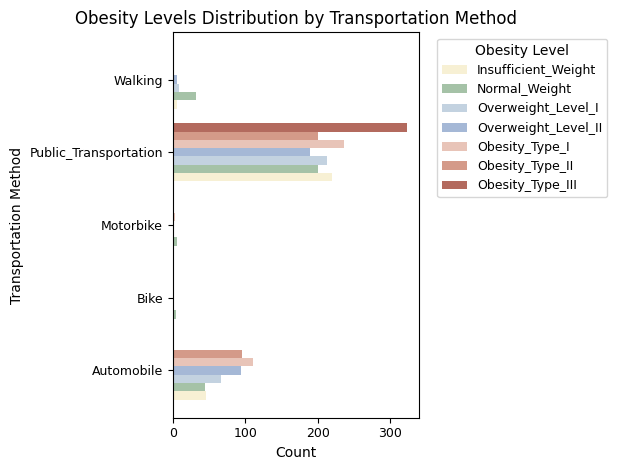

C:\Users\Huawei\AppData\Local\Temp\ipykernel_17908\2216744085.py:194: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='bmi_category', y='age', data=df, order=category_order, palette=colors)


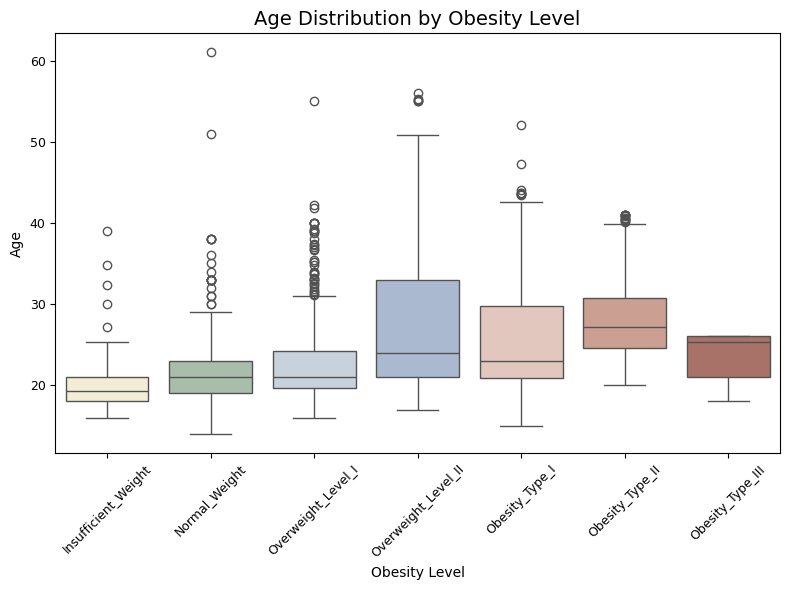

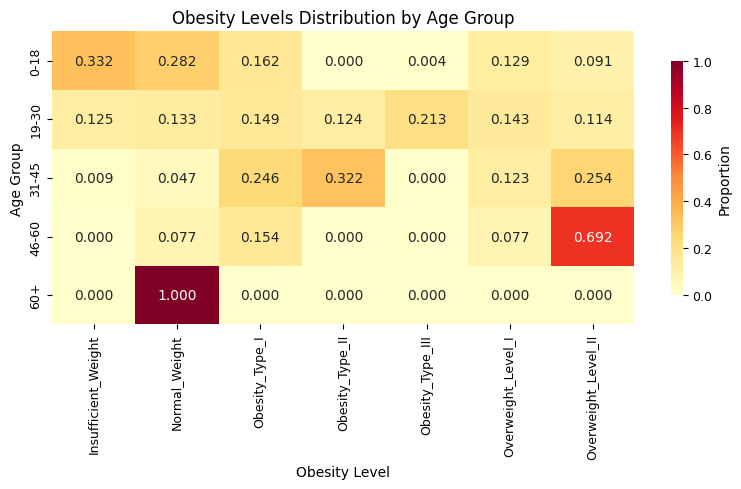

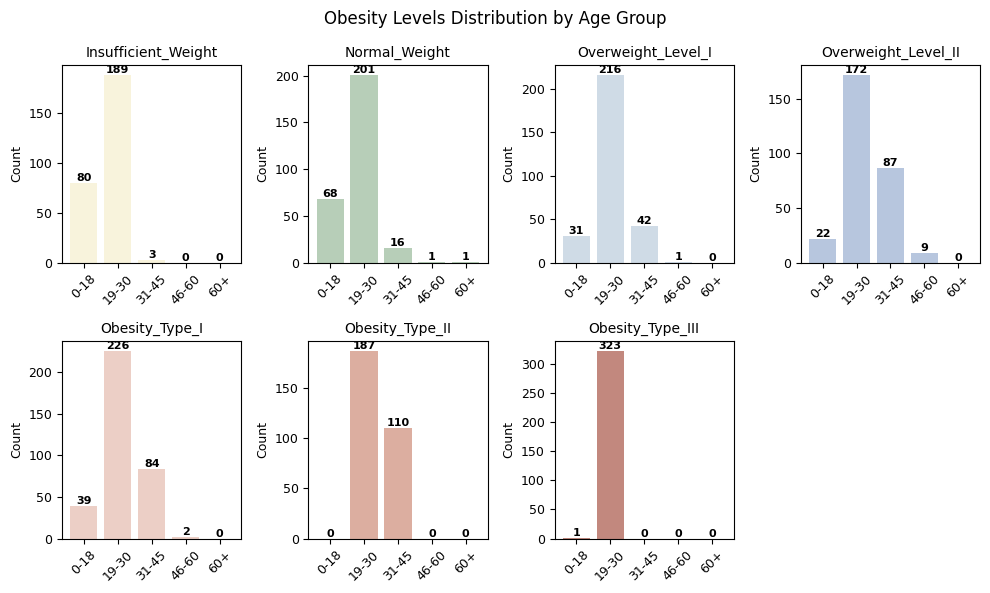

C:\Users\Huawei\AppData\Local\Temp\ipykernel_17908\2216744085.py:243: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='bmi_category', y='veggie_per_meal', data=df, order=category_order, palette=colors)


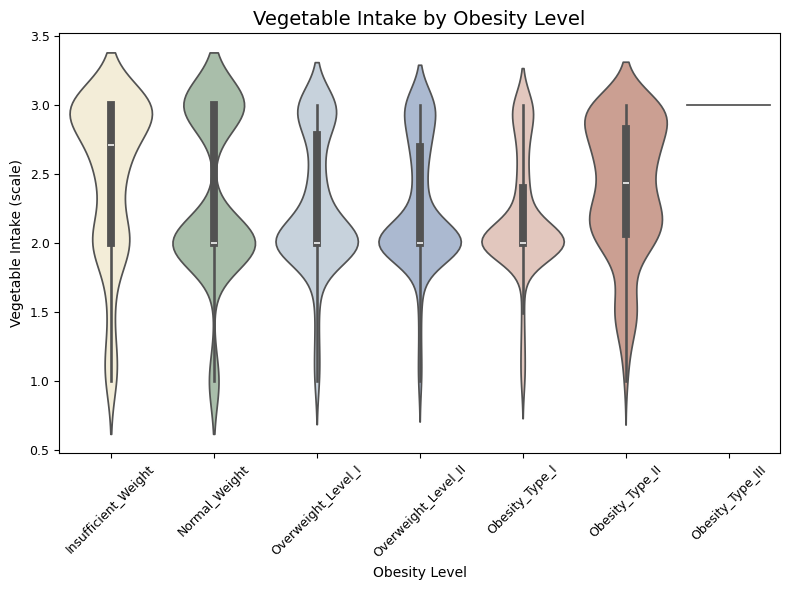

<Figure size 800x600 with 0 Axes>

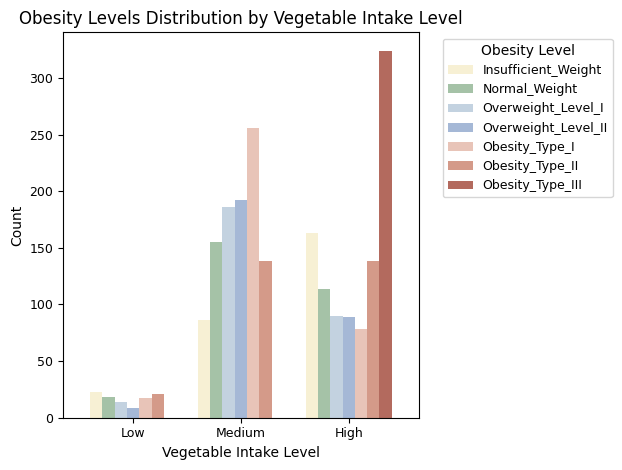

C:\Users\Huawei\AppData\Local\Temp\ipykernel_17908\2216744085.py:274: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='bmi_category', y='meals_daily', data=df, order=category_order, palette=colors)


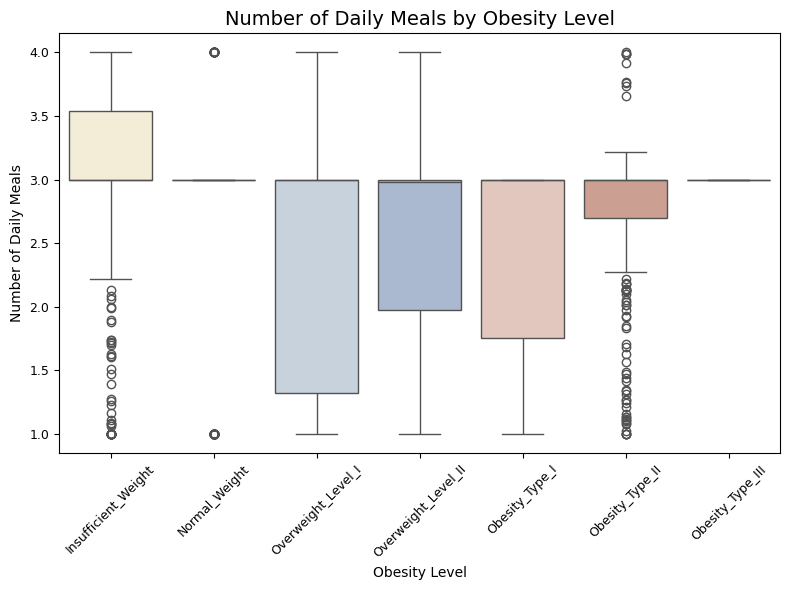

<Figure size 800x600 with 0 Axes>

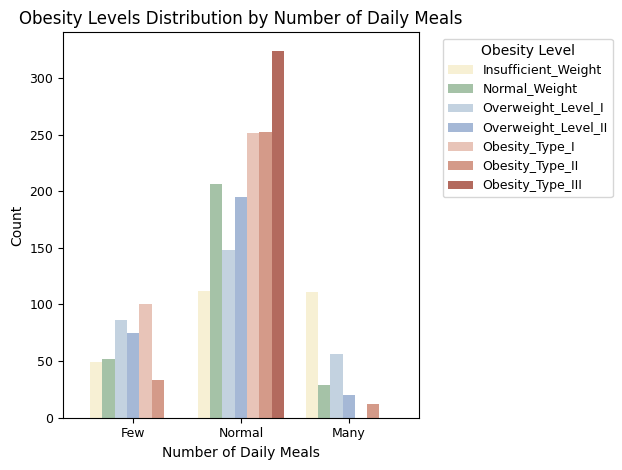

C:\Users\Huawei\AppData\Local\Temp\ipykernel_17908\2216744085.py:304: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='bmi_category', y='water_daily', data=df, order=category_order, palette=colors)


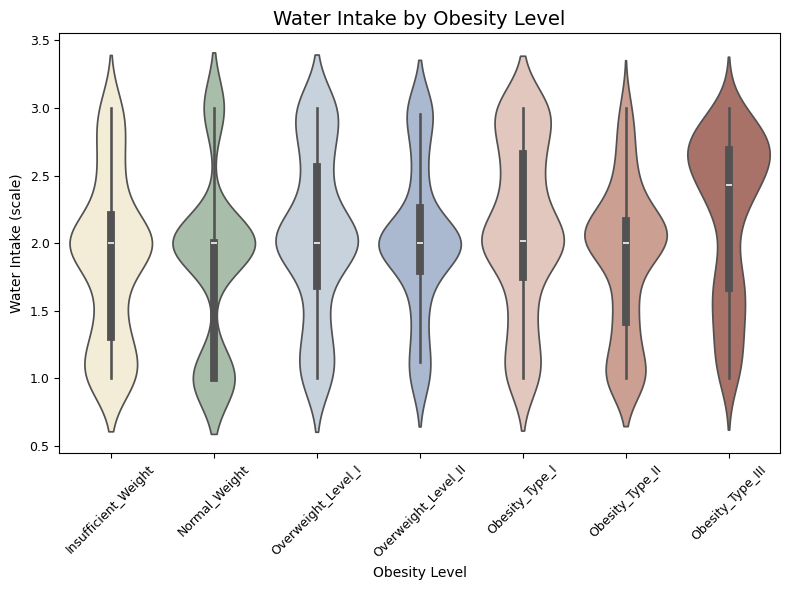

<Figure size 800x600 with 0 Axes>

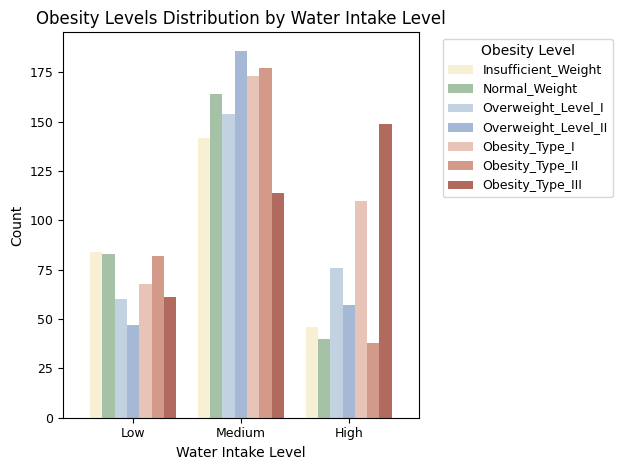

C:\Users\Huawei\AppData\Local\Temp\ipykernel_17908\2216744085.py:334: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='bmi_category', y='physical_activity', data=df, order=category_order, palette=colors)


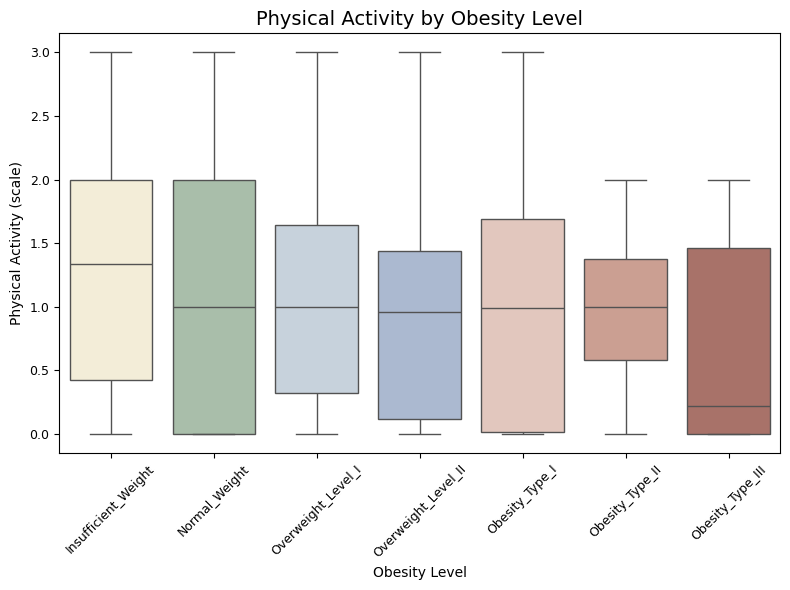

<Figure size 800x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

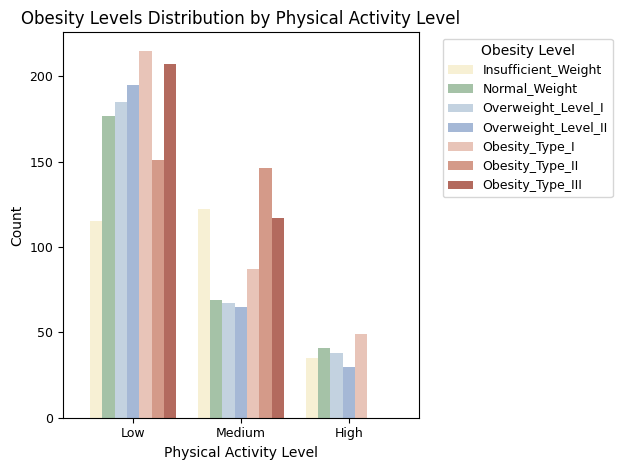

C:\Users\Huawei\AppData\Local\Temp\ipykernel_17908\2216744085.py:364: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='bmi_category', y='technological_devices', data=df, order=category_order, palette=colors)


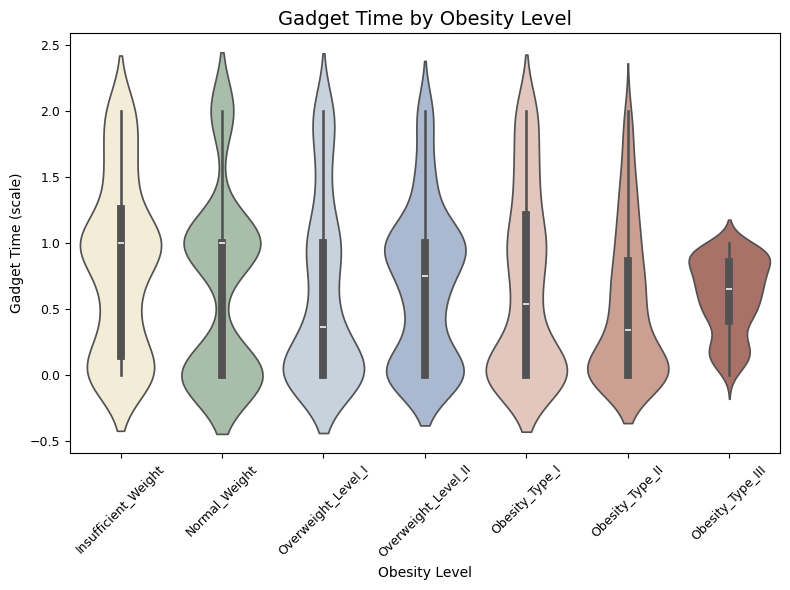

<Figure size 800x600 with 0 Axes>

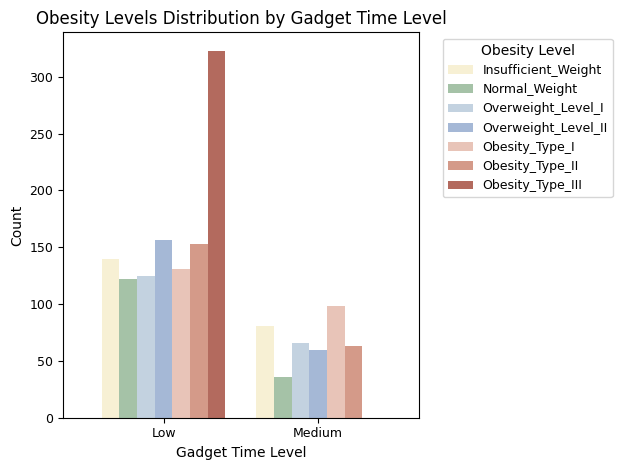

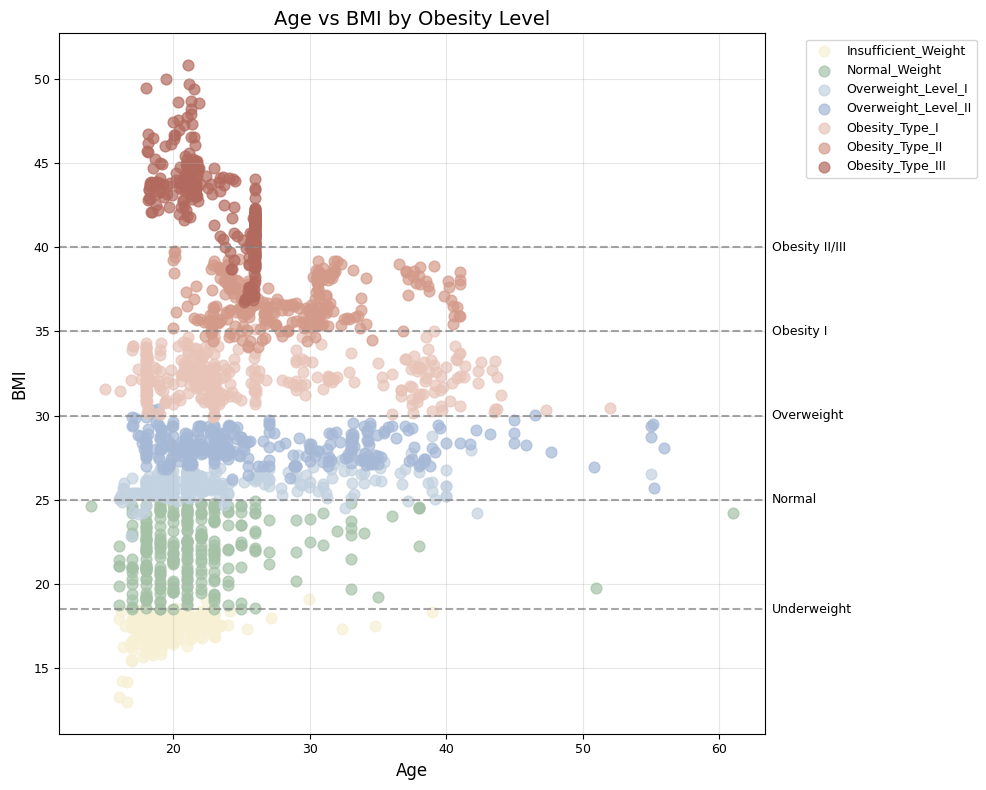

In [2]:
# 1. Descriptive

df = pd.read_csv('../assets/ObesityDataSet_raw_and_data_sinthetic.csv')
df.columns = df.columns.str.strip()

df = df.rename(columns={"Age": "age",
                        "Gender":"sex",
                        "Weight": "weight",
                        "Height": "height",
                        "family_history_with_overweight": "family_history",
                        "FAVC": "often_high_calorie_intake",
                        "FCVC": "veggie_per_meal",
                        "NCP": "meals_daily",
                        "CAEC": "freq_snack",
                        "SMOKE": "smoking",
                        "CH2O": "water_daily",
                        "SCC": "monitor_calorie",
                        "FAF": "physical_activity",
                        "TUE": "technological_devices",
                        "CALC": "freq_alcohol",
                        "MTRANS": "transport",
                        "NObeyesdad": "bmi_category"
                          })


target = "bmi_category"

# Numerical/Categorical Variables
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df.select_dtypes(include=["object"]).columns.drop(target).tolist()

print("Data shape:", df.shape)
print("Numerical variables:", numeric_cols)
print("Categorical variables:", categorical_cols)
print("Missing values:\n", df.isnull().sum())

# Descriptive Statistics
print("\nNumerical variables statistics:")
display(df[numeric_cols].describe().T)

print("\nCategorical variables cardinality:")
for col in categorical_cols:
    print(f"{col}: {df[col].nunique()}")


# Set unified font size and style
plt.rcParams['font.size'] = 10
plt.rcParams['axes.titlesize'] = 12
plt.rcParams['axes.labelsize'] = 10
plt.rcParams['xtick.labelsize'] = 9
plt.rcParams['ytick.labelsize'] = 9
plt.rcParams['legend.fontsize'] = 9

# 1. Obesity Level Distribution Overview - Pie Chart
plt.figure(figsize=(6, 6))
category_order = ['Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I',
                  'Overweight_Level_II', 'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III']
counts = df["bmi_category"].value_counts()
counts = counts.reindex(category_order)

explode = (0.05, 0.1, 0, 0, 0, 0, 0)
colors = ['#F7F0D4', '#A5C2A7', '#C3D2E0', '#A5B8D6', '#E8C4B8', '#D49A89', '#B36A5E']

print(counts)
plt.pie(counts.values, 
        labels=counts.index, 
        autopct='%1.1f%%', 
        startangle=90, 
        explode=explode,
        colors=colors,
        shadow=True)

plt.title("Distribution of Obesity Levels", pad=20)
plt.ylabel("")
plt.tight_layout()
plt.show()

# Categorical Variables Visualization
# 1. Obesity Level Distribution by Gender - Side-by-Side Bar Chart
plt.figure(figsize=(10, 6))
cross_tab = pd.crosstab(df['sex'], df['bmi_category'])
cross_tab = cross_tab[category_order] 

cross_tab.plot(kind='bar', color=colors, width=0.8)
plt.title('Obesity Levels Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Obesity Level', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# 2. Relationship between Family History and Obesity Level - Side-by-Side Bar Chart
plt.figure(figsize=(8, 6))
cross_tab_family = pd.crosstab(df['family_history'], df['bmi_category'])
cross_tab_family = cross_tab_family[category_order]

cross_tab_family.plot(kind='bar', color=colors, width=0.8)
plt.title('Obesity Levels Distribution by Family History', fontsize=12)
plt.xlabel('Family History of Overweight')
plt.ylabel('Count')
plt.legend(title='Obesity Level', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# 3. Relationship between High-Calorie Food Intake and Obesity Level - Side-by-Side Bar Chart
plt.figure(figsize=(10, 6))
cross_tab_favc = pd.crosstab(df['often_high_calorie_intake'], df['bmi_category'])
cross_tab_favc = cross_tab_favc[category_order]

cross_tab_favc.plot(kind='bar', color=colors, width=0.8)
plt.title('Obesity Levels Distribution by High Calorie Intake', fontsize=12)
plt.xlabel('Frequently Consumes High Calorie Food')
plt.ylabel('Count')
plt.legend(title='Obesity Level', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# 4. Relationship between Snack Frequency and Obesity Level - Side-by-Side Bar Chart
plt.figure(figsize=(10, 6))
cross_tab_snack = pd.crosstab(df['freq_snack'], df['bmi_category'])
cross_tab_snack = cross_tab_snack[category_order]

cross_tab_snack.plot(kind='bar', color=colors, width=0.8)
plt.title('Obesity Levels Distribution by Snack Frequency', fontsize=12)
plt.xlabel('Snack Frequency')
plt.ylabel('Count')
plt.legend(title='Obesity Level', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# 5. Relationship between Smoking Status and Obesity Level - Side-by-Side Bar Chart
plt.figure(figsize=(8, 6))
cross_tab_smoke = pd.crosstab(df['smoking'], df['bmi_category'])
cross_tab_smoke = cross_tab_smoke[category_order]

cross_tab_smoke.plot(kind='bar', color=colors, width=0.8)
plt.title('Obesity Levels Distribution by Smoking Status', fontsize=12)
plt.xlabel('Smoking Status')
plt.ylabel('Count')
plt.legend(title='Obesity Level', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# 6. Relationship between Calorie Monitoring and Obesity Level - Side-by-Side Bar Chart
plt.figure(figsize=(8, 6))
cross_tab_monitor = pd.crosstab(df['monitor_calorie'], df['bmi_category'])
cross_tab_monitor = cross_tab_monitor[category_order] 

cross_tab_monitor.plot(kind='bar', color=colors, width=0.8)
plt.title('Obesity Levels Distribution by Calorie Monitoring', fontsize=12)
plt.xlabel('Monitors Calorie Intake')
plt.ylabel('Count')
plt.legend(title='Obesity Level', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# 7. Relationship between Alcohol Frequency and Obesity Level - Side-by-Side Bar Chart
plt.figure(figsize=(10, 6))
cross_tab_alcohol = pd.crosstab(df['freq_alcohol'], df['bmi_category'])
cross_tab_alcohol = cross_tab_alcohol[category_order]

cross_tab_alcohol.plot(kind='bar', color=colors, width=0.8)
plt.title('Obesity Levels Distribution by Alcohol Frequency', fontsize=12)
plt.xlabel('Alcohol Frequency')
plt.ylabel('Count')
plt.legend(title='Obesity Level', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# 8. Relationship between Transportation Method and Obesity Level - Horizontal Bar Chart
plt.figure(figsize=(10, 6))
cross_tab_trans = pd.crosstab(df['transport'], df['bmi_category'])
cross_tab_trans = cross_tab_trans[category_order]

cross_tab_trans.plot(kind='barh', color=colors, width=0.8)
plt.title('Obesity Levels Distribution by Transportation Method', fontsize=12)
plt.xlabel('Count')
plt.ylabel('Transportation Method')
plt.legend(title='Obesity Level', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Numerical Variables Visualization
# 1. Relationship between Age and Obesity Level
# Box Plot
plt.figure(figsize=(8, 6))
sns.boxplot(x='bmi_category', y='age', data=df, order=category_order, palette=colors)
plt.title('Age Distribution by Obesity Level', fontsize=14)
plt.xlabel('Obesity Level')
plt.ylabel('Age')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Heatmap
df['age_group'] = pd.cut(df['age'], 
                         bins=[0, 18, 30, 45, 60, 100], 
                         labels=['0-18', '19-30', '31-45', '46-60', '60+'])
plt.figure(figsize=(8, 5))
age_bmi_crosstab = pd.crosstab(df['age_group'], df['bmi_category'], normalize='index')
sns.heatmap(age_bmi_crosstab, annot=True, fmt='.3f', cmap='YlOrRd', 
            cbar_kws={'label': 'Proportion', 'shrink': 0.8})
plt.title('Obesity Levels Distribution by Age Group')
plt.xlabel('Obesity Level')
plt.ylabel('Age Group')
plt.tight_layout()
plt.show()

# Small Multiples Plot
fig, axes = plt.subplots(2, 4, figsize=(10, 6))
axes = axes.flatten()

for i, category in enumerate(category_order):
    age_counts = df[df['bmi_category'] == category]['age_group'].value_counts().sort_index()
    axes[i].bar(age_counts.index, age_counts.values, color=colors[i], alpha=0.8)
    axes[i].set_title(f'{category}', fontsize=10)
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].set_ylabel('Count', fontsize=9)
    
    for j, v in enumerate(age_counts.values):
        axes[i].text(j, v + max(age_counts.values)*0.01, str(v), 
                    ha='center', fontsize=8, fontweight='bold')

if len(category_order) < len(axes):
    for i in range(len(category_order), len(axes)):
        axes[i].set_visible(False)

plt.suptitle('Obesity Levels Distribution by Age Group', fontsize=12, y=0.98)
plt.tight_layout()
plt.show()


# 2. Relationship between Vegetable Intake and Obesity Level
# Violin Plot
plt.figure(figsize=(8, 6))
sns.violinplot(x='bmi_category', y='veggie_per_meal', data=df, order=category_order, palette=colors)
plt.title('Vegetable Intake by Obesity Level', fontsize=14)
plt.xlabel('Obesity Level')
plt.ylabel('Vegetable Intake (scale)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Side-by-Side Bar Chart
plt.figure(figsize=(8, 6))
# Categorize vegetable intake into Low, Medium, High
df['veggie_intake_level'] = pd.cut(df['veggie_per_meal'], 
                                  bins=[0, 1.5, 2.5, 3], 
                                  labels=['Low', 'Medium', 'High'])

cross_tab_veggie = pd.crosstab(df['veggie_intake_level'], df['bmi_category'])
cross_tab_veggie = cross_tab_veggie[category_order]

cross_tab_veggie.plot(kind='bar', color=colors, width=0.8)
plt.title('Obesity Levels Distribution by Vegetable Intake Level', fontsize=12)
plt.xlabel('Vegetable Intake Level')
plt.ylabel('Count')
plt.legend(title='Obesity Level', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


# 3. Relationship between Number of Daily Meals and Obesity Level
# Box Plot
plt.figure(figsize=(8, 6))
sns.boxplot(x='bmi_category', y='meals_daily', data=df, order=category_order, palette=colors)
plt.title('Number of Daily Meals by Obesity Level', fontsize=14)
plt.xlabel('Obesity Level')
plt.ylabel('Number of Daily Meals')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Side-by-Side Bar Chart
plt.figure(figsize=(8, 6))
df['meals_level'] = pd.cut(df['meals_daily'], 
                          bins=[0, 2, 3, 4], 
                          labels=['Few', 'Normal', 'Many'])

cross_tab_meals = pd.crosstab(df['meals_level'], df['bmi_category'])
cross_tab_meals = cross_tab_meals[category_order]

cross_tab_meals.plot(kind='bar', color=colors, width=0.8)
plt.title('Obesity Levels Distribution by Number of Daily Meals', fontsize=12)
plt.xlabel('Number of Daily Meals')
plt.ylabel('Count')
plt.legend(title='Obesity Level', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


# 4. Relationship between Daily Water Intake and Obesity Level
# Violin Plot
plt.figure(figsize=(8, 6))
sns.violinplot(x='bmi_category', y='water_daily', data=df, order=category_order, palette=colors)
plt.title('Water Intake by Obesity Level', fontsize=14)
plt.xlabel('Obesity Level')
plt.ylabel('Water Intake (scale)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Side-by-Side Bar Chart
plt.figure(figsize=(8, 6))
# Categorize water intake into Low, Medium, High
df['water_intake_level'] = pd.cut(df['water_daily'], 
                                 bins=[0, 1.5, 2.5, 3], 
                                 labels=['Low', 'Medium', 'High'])

cross_tab_water = pd.crosstab(df['water_intake_level'], df['bmi_category'])
cross_tab_water = cross_tab_water[category_order]

cross_tab_water.plot(kind='bar', color=colors, width=0.8)
plt.title('Obesity Levels Distribution by Water Intake Level', fontsize=12)
plt.xlabel('Water Intake Level')
plt.ylabel('Count')
plt.legend(title='Obesity Level', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# 5. Relationship between Physical Activity and Obesity Level
# Box Plot
plt.figure(figsize=(8, 6))
sns.boxplot(x='bmi_category', y='physical_activity', data=df, order=category_order, palette=colors)
plt.title('Physical Activity by Obesity Level', fontsize=14)
plt.xlabel('Obesity Level')
plt.ylabel('Physical Activity (scale)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Side-by-Side Bar Chart
plt.figure(figsize=(8, 6))
df['physical_activity_level'] = pd.cut(df['physical_activity'], 
                                       bins=[-1, 1, 2, 3], 
                                       labels=['Low', 'Medium', 'High'])

plt.figure(figsize=(10, 6))
cross_tab_pa = pd.crosstab(df['physical_activity_level'], df['bmi_category'])
cross_tab_pa = cross_tab_pa[category_order]

cross_tab_pa.plot(kind='bar', color=colors, width=0.8)
plt.title('Obesity Levels Distribution by Physical Activity Level', fontsize=12)
plt.xlabel('Physical Activity Level')
plt.ylabel('Count')
plt.legend(title='Obesity Level', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# 6. Relationship between Gadget Usage Time and Obesity Level
# Violin Plot
plt.figure(figsize=(8, 6))
sns.violinplot(x='bmi_category', y='technological_devices', data=df, order=category_order, palette=colors)
plt.title('Gadget Time by Obesity Level', fontsize=14)
plt.xlabel('Obesity Level')
plt.ylabel('Gadget Time (scale)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Side-by-Side Bar Chart
plt.figure(figsize=(8, 6))
df['gadget_time_level'] = pd.cut(df['technological_devices'], 
                                bins=[0, 1, 2, 3], 
                                labels=['Low', 'Medium', 'High'])

cross_tab_gadget = pd.crosstab(df['gadget_time_level'], df['bmi_category'])
cross_tab_gadget = cross_tab_gadget[category_order]

cross_tab_gadget.plot(kind='bar', color=colors, width=0.8)
plt.title('Obesity Levels Distribution by Gadget Time Level', fontsize=12)
plt.xlabel('Gadget Time Level')
plt.ylabel('Count')
plt.legend(title='Obesity Level', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# 7. Scatter Plot of Age vs BMI (colored by obesity level)
df['bmi'] = df['weight'] / (df['height'] ** 2)
plt.figure(figsize=(10, 8))

for i, category in enumerate(category_order):
    subset = df[df['bmi_category'] == category]
    plt.scatter(subset['age'], subset['bmi'], 
                color=colors[i],  # Use colors directly from the colors list
                label=category, 
                alpha=0.7,
                s=60)

# Add major BMI classification reference lines
plt.axhline(y=18.5, color='gray', linestyle='--', alpha=0.7)
plt.axhline(y=25, color='gray', linestyle='--', alpha=0.7)
plt.axhline(y=30, color='gray', linestyle='--', alpha=0.7)
plt.axhline(y=35, color='gray', linestyle='--', alpha=0.7)
plt.axhline(y=40, color='gray', linestyle='--', alpha=0.7)

# Add labels
plt.text(plt.xlim()[1] + 0.5, 18.5, 'Underweight', va='center', fontsize=9)
plt.text(plt.xlim()[1] + 0.5, 25, 'Normal', va='center', fontsize=9)
plt.text(plt.xlim()[1] + 0.5, 30, 'Overweight', va='center', fontsize=9)
plt.text(plt.xlim()[1] + 0.5, 35, 'Obesity I', va='center', fontsize=9)
plt.text(plt.xlim()[1] + 0.5, 40, 'Obesity II/III', va='center', fontsize=9)

plt.title('Age vs BMI by Obesity Level', fontsize=14)
plt.xlabel('Age', fontsize=12)
plt.ylabel('BMI', fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

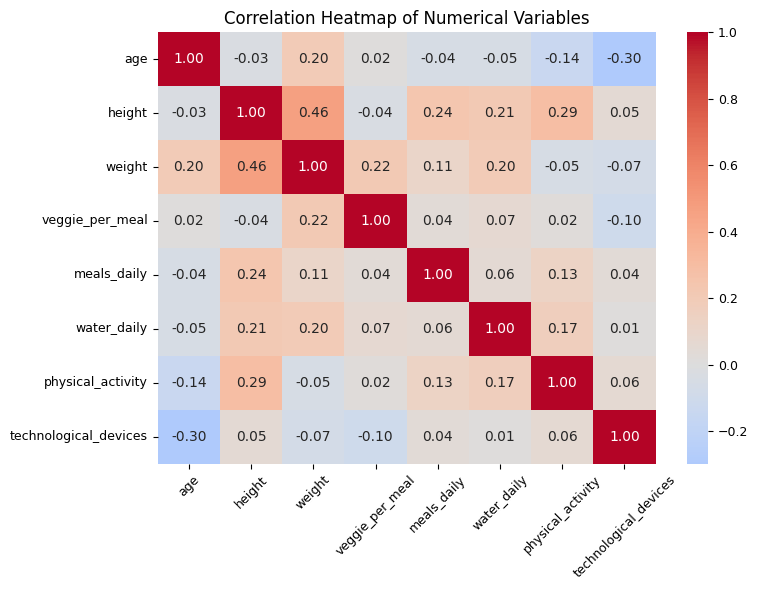

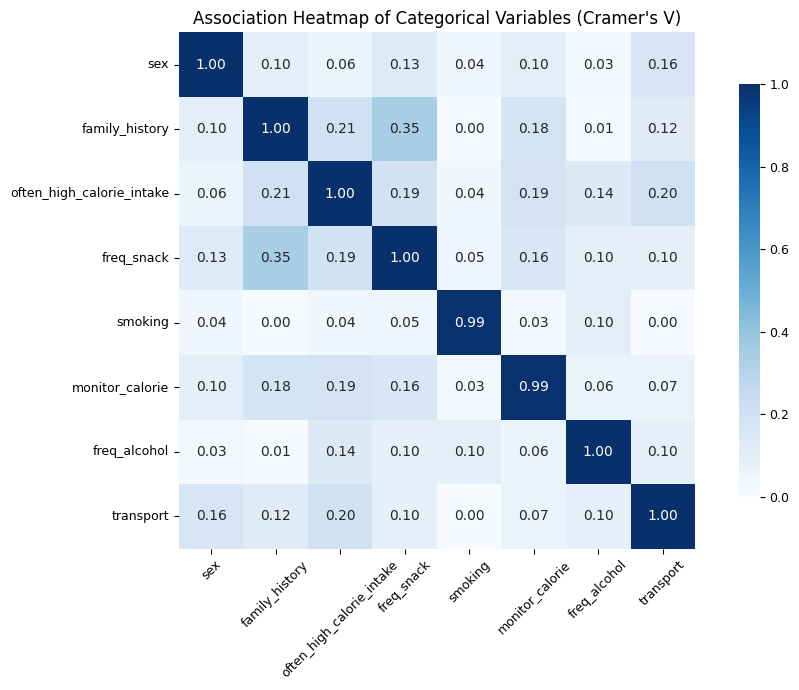

In [3]:
# Calculate correlation heatmap for all numerical variables
plt.figure(figsize=(8, 6))
correlation_matrix = df[numeric_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", center=0)
plt.title("Correlation Heatmap of Numerical Variables")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Calculate Cramer's V for all categorical variables
def cramers_v(x, y):
    """Calculate Cramer's V between two categorical variables"""
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

categorical_vars = categorical_cols
cramer_matrix = pd.DataFrame(index=categorical_vars, columns=categorical_vars)

for i in categorical_vars:
    for j in categorical_vars:
        cramer_matrix.loc[i, j] = cramers_v(df[i], df[j])

plt.figure(figsize=(10, 7))
sns.heatmap(cramer_matrix.astype(float), annot=True, cmap="Blues", fmt=".2f",
            square=True, cbar_kws={"shrink": .8})
plt.title("Association Heatmap of Categorical Variables (Cramer's V)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Multiclass Logistic Regression Coefficients (Multifactorial Analysis):


e:\6 KI\8_ML413N Project management and tools for health informatics\PROHI-dashboard-Oberisk\env\Lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


,age,height,weight,veggie_per_meal,meals_daily,water_daily,physical_activity,technological_devices,sex_Male,family_history_yes,...,freq_snack_no,smoking_yes,monitor_calorie_yes,freq_alcohol_Frequently,freq_alcohol_Sometimes,freq_alcohol_no,transport_Bike,transport_Motorbike,transport_Public_Transportation,transport_Walking
Insufficient_Weight,-0.844692,3.649898,-13.325513,0.044867,-0.003009,0.083355,0.276134,0.091348,-0.456071,-0.902760,...,0.028523,-0.616525,-0.195212,-0.369625,0.185507,0.295325,-0.665957,-0.352191,-0.365883,-0.155142
Normal_Weight,-0.314333,1.918198,-7.353230,-0.294724,-0.059847,-0.197974,0.342499,-0.037814,0.390096,-0.797878,...,-1.022892,0.495450,-0.027212,0.106566,-0.286255,0.053269,0.468461,0.581347,-0.379217,0.959894
Obesity_Type_I,-0.020298,-1.790778,5.177175,-0.637165,-0.278388,0.260762,0.228165,0.057836,-0.350488,0.491018,...,-0.441959,0.506038,-0.436019,0.382090,-0.485482,0.183680,-0.026249,0.670171,-0.441535,-0.533553
Obesity_Type_II,1.281937,-2.718205,10.236652,-0.407942,-0.265971,-0.487440,-0.210083,-0.184782,3.343611,0.372578,...,0.277079,0.259151,-0.030805,-0.579131,-0.050568,0.480696,0.004980,-0.119752,0.848554,0.130468
Obesity_Type_III,-0.357858,-2.242538,8.420867,2.155323,1.025382,0.263456,-0.789948,-0.099611,-3.575878,0.493567,...,0.008079,-0.078468,0.012059,0.000304,0.957015,-1.029328,0.001072,-0.007106,0.736420,-0.031227
Overweight_Level_I,-0.214349,1.044718,-3.033633,-0.493323,-0.103789,0.045808,0.169293,-0.026213,-0.348098,-0.519047,...,1.319516,-0.430809,1.112862,0.201413,0.194061,-0.325241,0.677016,-0.487548,-0.581126,-0.005416
Overweight_Level_II,0.469594,0.138707,-0.122319,-0.367036,-0.314378,0.032034,-0.016059,0.199235,0.996827,0.862523,...,-0.168347,-0.134837,-0.435674,0.258382,-0.514276,0.341599,-0.459323,-0.284920,0.182786,-0.365024


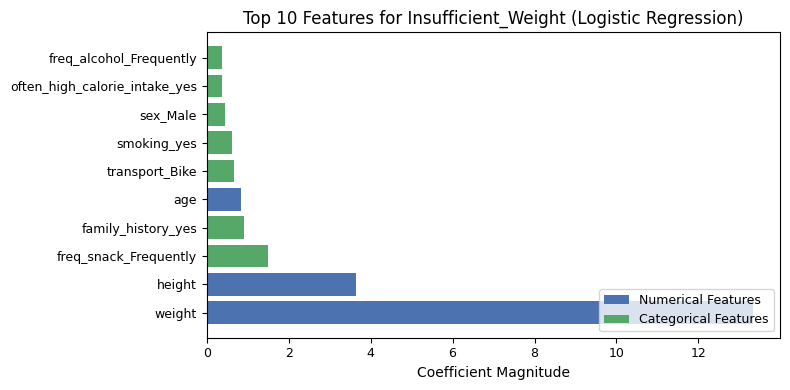

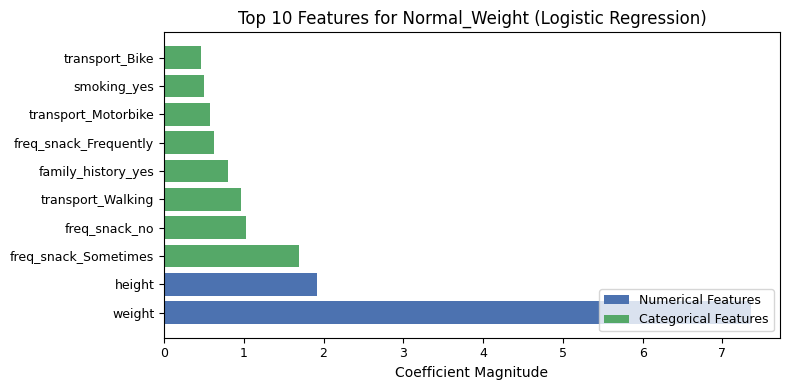

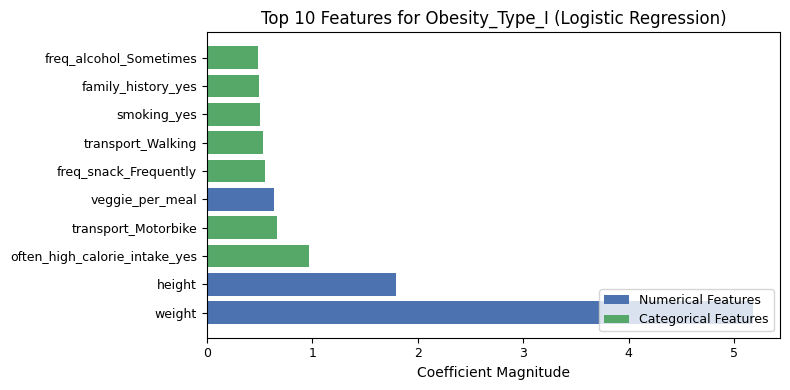

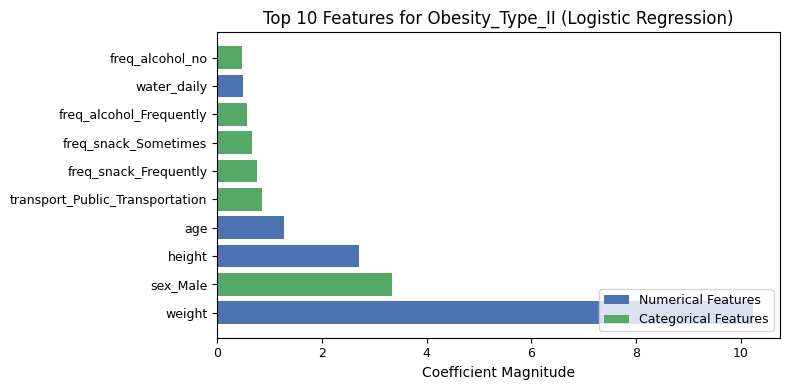

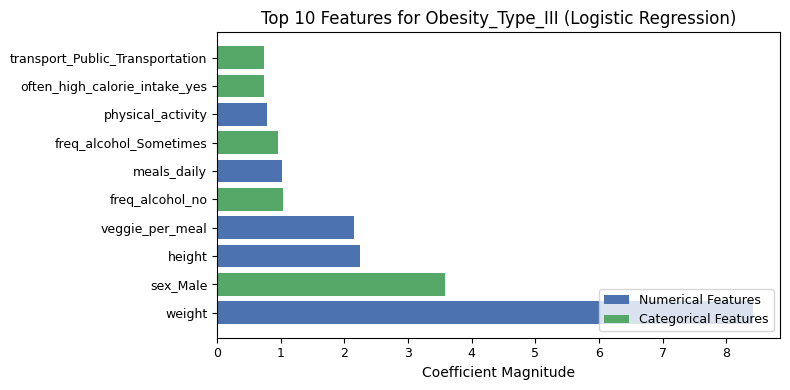

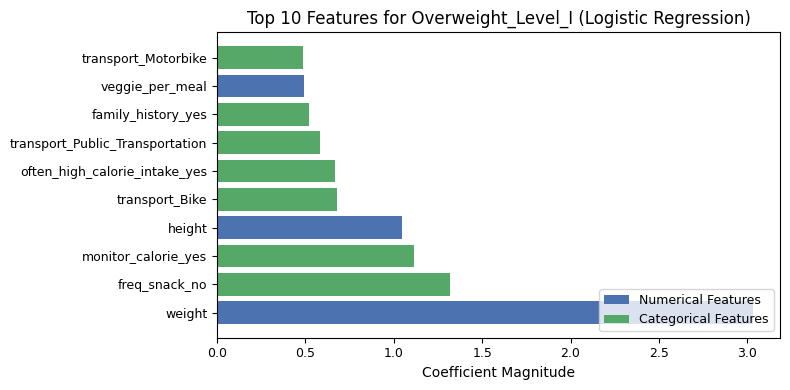

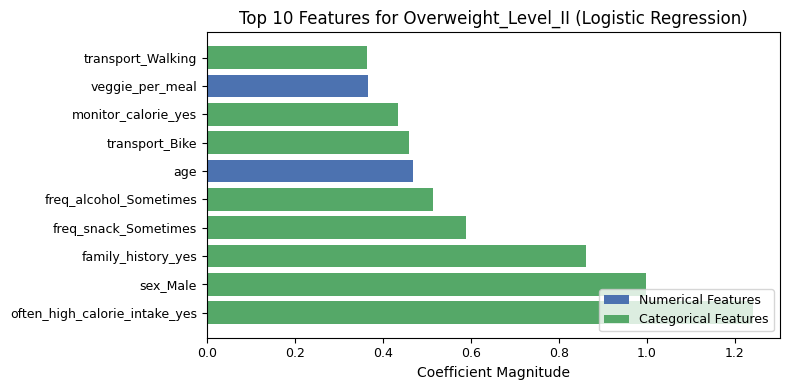

Association Strength of All Variables with Target Variable (Eta-squared/Cramer's V):


,Association_Strength
weight,0.848667
sex,0.555773
family_history,0.540307
freq_snack,0.352314
often_high_calorie_intake,0.328243
veggie_per_meal,0.242591
monitor_calorie,0.235500
freq_alcohol,0.225146
age,0.181872
transport,0.178516


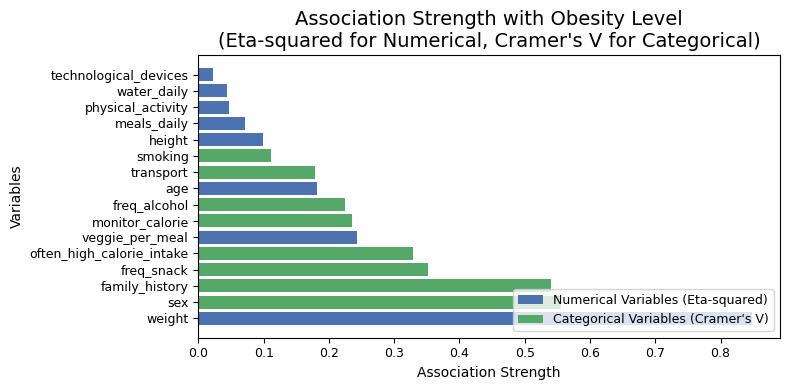

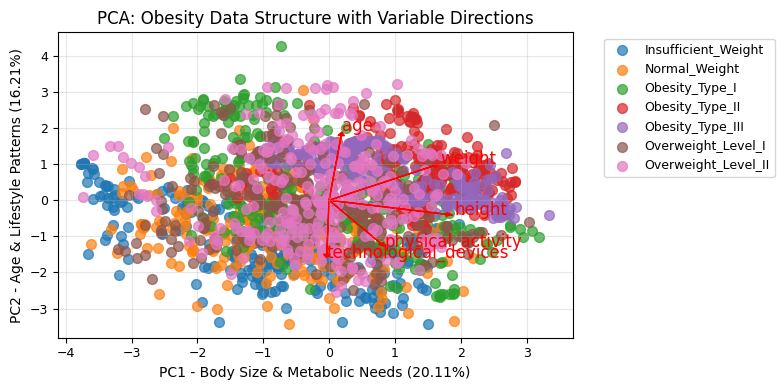

Feature Loadings for Principal Components (Top 10 Most Important Features):

PC1 Most Important Features:


,Feature,Weight
0,height,0.594367
1,weight,0.528341
2,water_daily,0.354452
3,meals_daily,0.299293
4,physical_activity,0.262257
5,sex_Male,0.161611
6,veggie_per_meal,0.130494
7,family_history_yes,0.112076
8,freq_snack_Sometimes,0.076738
9,freq_alcohol_no,0.075635



PC2 Most Important Features:


,Feature,Weight
0,age,0.596720
1,technological_devices,0.498524
2,physical_activity,0.399299
3,weight,0.317064
4,veggie_per_meal,0.228184
5,meals_daily,0.149431
6,height,0.129654
7,transport_Public_Transportation,0.104886
8,water_daily,0.092275
9,family_history_yes,0.071046


In [4]:
# 2. Diagnostic

# 1. Logistic Regression Analysis
df_analysis = df[numeric_cols + categorical_cols + [target]].copy()

# missing values
for col in numeric_cols:
    df_analysis[col] = df_analysis[col].fillna(df_analysis[col].median())
for col in categorical_cols:
    df_analysis[col] = df_analysis[col].fillna(df_analysis[col].mode()[0] if not df_analysis[col].mode().empty else "Missing")

X = df_analysis[numeric_cols + categorical_cols]
y = df_analysis[target]

# Target variable encoding
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Create preprocessing pipeline: standardize numerical variables, one-hot encode categorical variables
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numeric_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore', drop='first'), categorical_cols)
])

# Fit the preprocessor
X_processed = preprocessor.fit_transform(X)

# Get feature names
numeric_features = numeric_cols
categorical_features = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols)
all_features = list(numeric_features) + list(categorical_features)

# Train multiclass logistic regression model
logreg = LogisticRegression(multi_class='multinomial', max_iter=1000, penalty='l2', C=1.0, random_state=42)
logreg.fit(X_processed, y_encoded)

# Get coefficients
coefficients = logreg.coef_

# Create coefficient dataframe
coef_df = pd.DataFrame(coefficients, columns=all_features, index=le.classes_)

print("Multiclass Logistic Regression Coefficients (Multifactorial Analysis):")
display(coef_df)

# Visualize the most important features for each class
n_top_features = 10
for i, class_name in enumerate(le.classes_):
    # Get absolute coefficient values for this class and sort them
    class_coef = coef_df.loc[class_name].abs().sort_values(ascending=False).head(n_top_features)
    
    # Create chart
    plt.figure(figsize=(8, 4))
    colors = ['#4C72B0' if feature in numeric_cols else '#55A868' for feature in class_coef.index]
    bars = plt.barh(range(len(class_coef)), class_coef.values, color=colors)
    plt.yticks(range(len(class_coef)), class_coef.index)
    plt.xlabel('Coefficient Magnitude')
    plt.title(f'Top {n_top_features} Features for {class_name} (Logistic Regression)')
    
    from matplotlib.patches import Patch
    legend_elements = [Patch(facecolor='#4C72B0', label='Numerical Features'),
                       Patch(facecolor='#55A868', label='Categorical Features')]
    plt.legend(handles=legend_elements, loc='lower right')
    
    plt.tight_layout()
    plt.show()


# 2. Using Correlation Ratio (Eta-squared) 
eta_squared_results = {}

# For numerical variables, use Eta-squared from ANOVA
for col in numeric_cols:
    clean_data = df_analysis[[col, target]].dropna()
    if len(clean_data) > 0:
        groups = [clean_data[clean_data[target] == category][col] for category in category_order]
        
        overall_mean = clean_data[col].mean()
        ss_total = np.sum((clean_data[col] - overall_mean) ** 2)
        ss_between = 0
        for group in groups:
            if len(group) > 0:
                ss_between += len(group) * (group.mean() - overall_mean) ** 2
        
        eta_squared = ss_between / ss_total if ss_total != 0 else 0
        eta_squared_results[col] = eta_squared
    else:
        eta_squared_results[col] = 0

# For categorical variables, use Cramer's V as association strength measure
for col in categorical_cols:
    clean_data = df_analysis[[col, target]].dropna()
    if len(clean_data) > 0:
        cross_tab = pd.crosstab(clean_data[col], clean_data[target])
        chi2 = chi2_contingency(cross_tab)[0]
        n = cross_tab.sum().sum()
        phi2 = chi2 / n
        r, k = cross_tab.shape
        phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
        rcorr = r - ((r-1)**2)/(n-1)
        kcorr = k - ((k-1)**2)/(n-1)
        cramers_v = np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))
        eta_squared_results[col] = cramers_v
    else:
        eta_squared_results[col] = 0

eta_df = pd.DataFrame.from_dict(eta_squared_results, orient='index', columns=['Association_Strength'])
eta_df = eta_df.sort_values('Association_Strength', ascending=False)

print("Association Strength of All Variables with Target Variable (Eta-squared/Cramer's V):")
display(eta_df)

# Visualization
plt.figure(figsize=(8, 4))
colors = ['#4C72B0' if col in numeric_cols else '#55A868' for col in eta_df.index]
bars = plt.barh(range(len(eta_df)), eta_df['Association_Strength'], color=colors)
plt.title('Association Strength with Obesity Level\n(Eta-squared for Numerical, Cramer\'s V for Categorical)', fontsize=14)
plt.xlabel('Association Strength')
plt.ylabel('Variables')
plt.yticks(range(len(eta_df)), eta_df.index)

from matplotlib.patches import Patch
legend_elements = [Patch(facecolor='#4C72B0', label='Numerical Variables (Eta-squared)'),
                   Patch(facecolor='#55A868', label='Categorical Variables (Cramer\'s V)')]
plt.legend(handles=legend_elements, loc='lower right')

plt.tight_layout()
plt.show()

# 3. Multivariate Analysis - Principal Component Analysis (PCA)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_processed.toarray() if hasattr(X_processed, 'toarray') else X_processed)

# Get feature loadings for principal components
pca_components = pca.components_
feature_weights = pd.DataFrame(pca_components, columns=all_features, index=[f'PC{i+1}' for i in range(2)])

plt.figure(figsize=(8, 4))
for i, category in enumerate(le.classes_):
    mask = (y_encoded == i)
    plt.scatter(X_pca[mask, 0], X_pca[mask, 1], 
                label=category, alpha=0.7, s=50)

# Add explanatory arrows for main variable directions
# Select the most important variables to draw arrows
important_vars = ['height', 'weight', 'age', 'technological_devices', 'physical_activity']
for i, var in enumerate(important_vars):
    if var in feature_weights.columns:
        # Get the variable's loadings on PC1 and PC2
        pc1_load = feature_weights.loc['PC1', var]
        pc2_load = feature_weights.loc['PC2', var]
        
        # Draw arrow
        plt.arrow(0, 0, pc1_load*3, pc2_load*3, head_width=0.1, head_length=0.1, fc='red', ec='red')
        plt.text(pc1_load*3.2, pc2_load*3.2, var, color='red', fontsize=12)

plt.xlabel(f'PC1 - Body Size & Metabolic Needs ({pca.explained_variance_ratio_[0]:.2%})')
plt.ylabel(f'PC2 - Age & Lifestyle Patterns ({pca.explained_variance_ratio_[1]:.2%})')
plt.title('PCA: Obesity Data Structure with Variable Directions')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# View feature loadings for principal components
print("Feature Loadings for Principal Components (Top 10 Most Important Features):")
# For each principal component, display the 10 most important features
for i in range(2):
    pc_weights = feature_weights.iloc[i].abs().sort_values(ascending=False).head(10)
    print(f"\nPC{i+1} Most Important Features:")
    display(pd.DataFrame({'Feature': pc_weights.index, 'Weight': pc_weights.values}))


Class distribution:
bmi_category
1    1552
0     559
Name: count, dtype: int64
Risk ratio: 73.52%

LogisticRegression Performance:
Accuracy: 0.9882
Precision: 0.9842
Recall: 1.0000
F1 Score: 0.9920


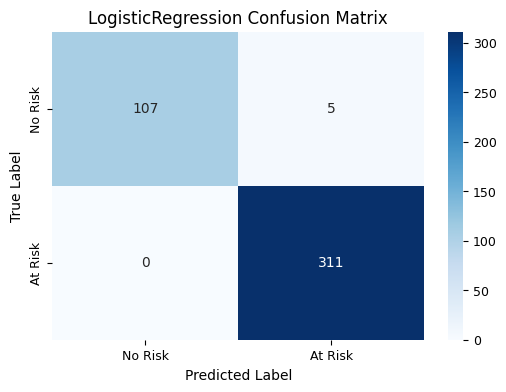

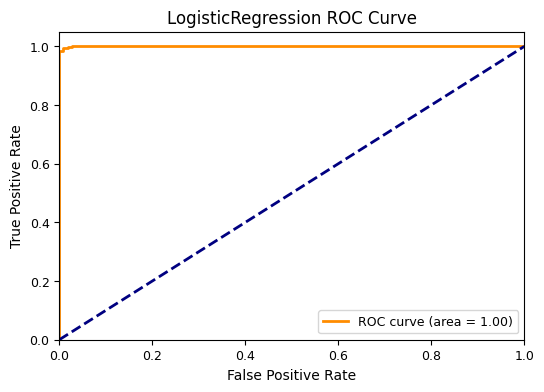


RandomForest Performance:
Accuracy: 0.9693
Precision: 0.9901
Recall: 0.9678
F1 Score: 0.9789


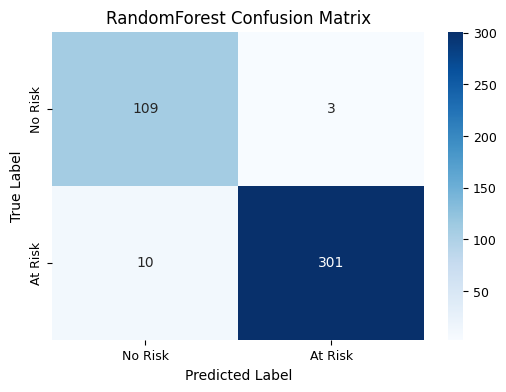

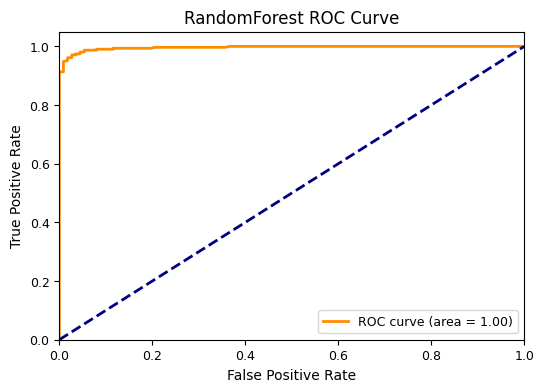


XGBoost Performance:
Accuracy: 0.9905
Precision: 0.9968
Recall: 0.9904
F1 Score: 0.9935


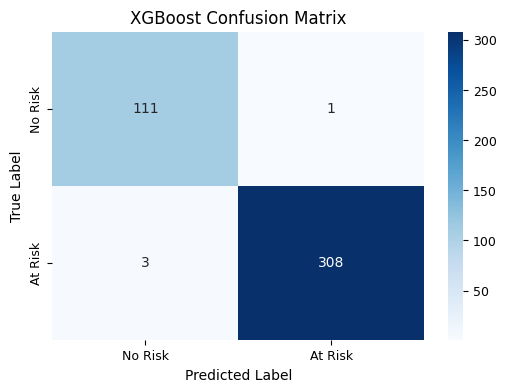

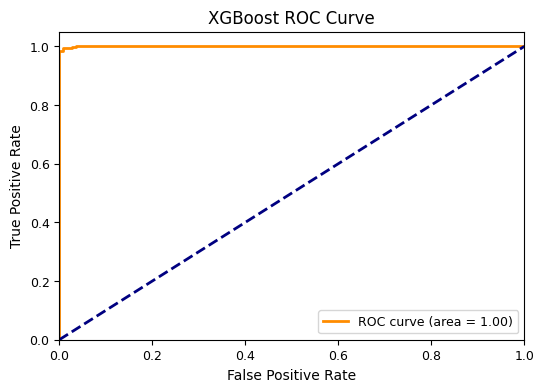

[LightGBM] [Info] Number of positive: 1241, number of negative: 447
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000195 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2077
[LightGBM] [Info] Number of data points in the train set: 1688, number of used features: 28
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.735190 -> initscore=1.021114
[LightGBM] [Info] Start training from score 1.021114
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

LightGBM Performance:
Accuracy: 0.9882
Precision: 0.9935
Recall: 0.9904
F1 Score: 0.9919


e:\6 KI\8_ML413N Project management and tools for health informatics\PROHI-dashboard-Oberisk\env\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


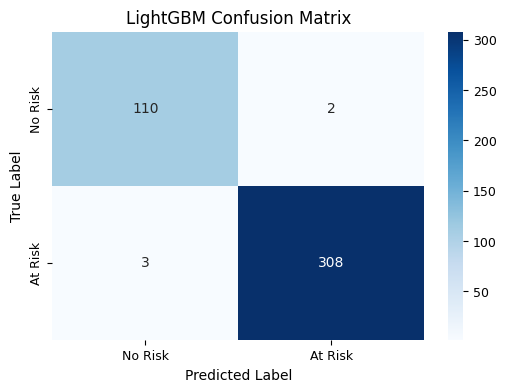

e:\6 KI\8_ML413N Project management and tools for health informatics\PROHI-dashboard-Oberisk\env\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


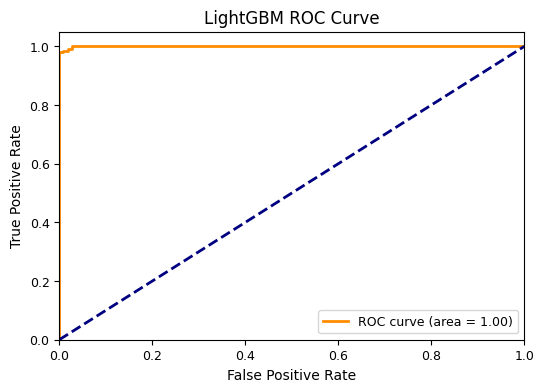


Model Performance Comparison:


,Accuracy,Precision,Recall,F1 Score
LogisticRegression,0.988180,0.984177,1.000000,0.992026
RandomForest,0.969267,0.990132,0.967846,0.978862
XGBoost,0.990544,0.996764,0.990354,0.993548
LightGBM,0.988180,0.993548,0.990354,0.991948



Best model based on accuracy: XGBoost


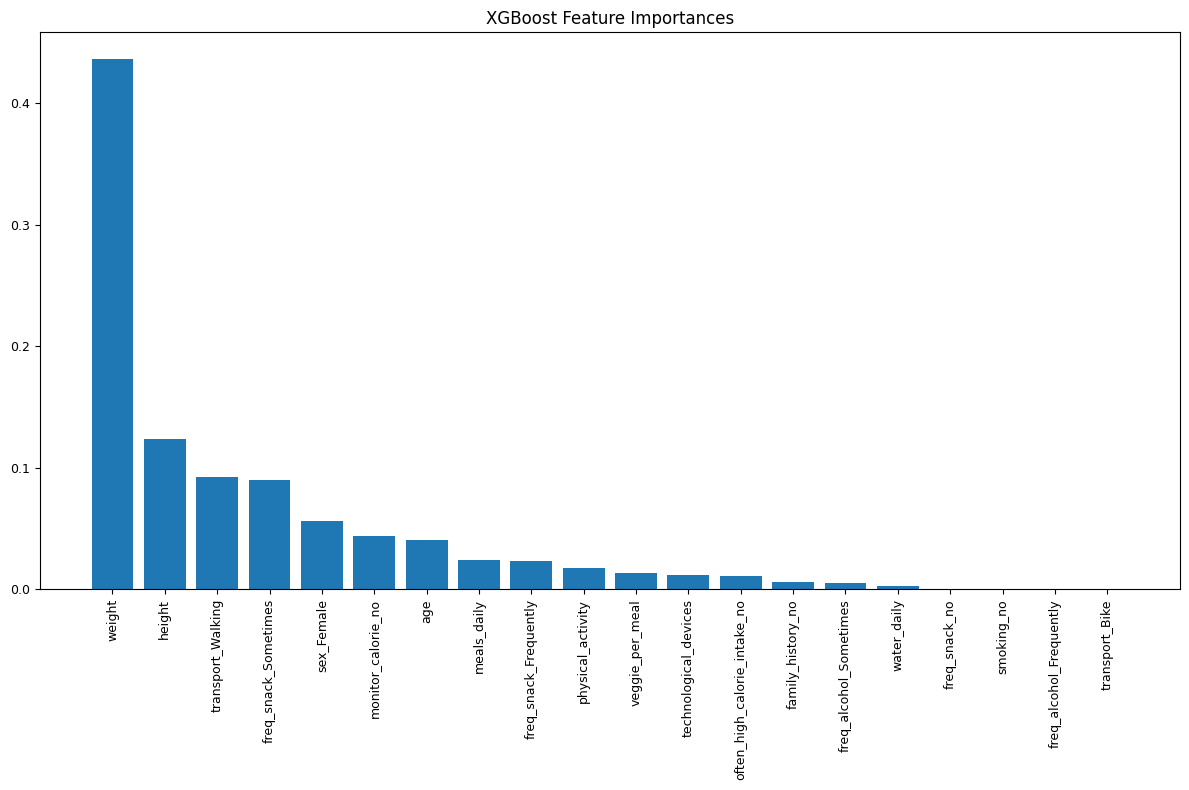


Top 10 most important features:
1. weight: 0.4367
2. height: 0.1240
3. transport_Walking: 0.0929
4. freq_snack_Sometimes: 0.0897
5. sex_Female: 0.0567
6. monitor_calorie_no: 0.0443
7. age: 0.0406
8. meals_daily: 0.0240
9. freq_snack_Frequently: 0.0233
10. physical_activity: 0.0180


In [5]:
# 3. Predictive - Binary Classification for Obesity Risk
from sklearn.metrics import precision_score, recall_score, f1_score, roc_curve, auc
import numpy as np

# Convert multi-class target to binary: 1 for obesity risk, 0 for no risk
# Assuming categories: 'Insufficient_Weight', 'Normal_Weight' = no risk (0)
# 'Overweight_Level_I', 'Overweight_Level_II', 'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III' = risk (1)
y_binary = y.apply(lambda x: 0 if x in ['Insufficient_Weight', 'Normal_Weight'] else 1)

# Check class distribution
print("Class distribution:")
print(y_binary.value_counts())
print(f"Risk ratio: {y_binary.mean():.2%}")

X_train, X_test, y_train, y_test = train_test_split(
    X, y_binary, test_size=0.2, random_state=42, stratify=y_binary
)

preprocessor = ColumnTransformer([
    ("num", StandardScaler(), numeric_cols),
    ("cat", OneHotEncoder(handle_unknown="ignore", sparse_output=False), categorical_cols)
])

# Update models for binary classification (removed use_label_encoder parameter for XGBoost)
models = {
    "LogisticRegression": LogisticRegression(max_iter=1000),
    "RandomForest": RandomForestClassifier(n_estimators=200, random_state=42),
    "XGBoost": xgb.XGBClassifier(eval_metric="logloss", random_state=42),
    "LightGBM": lgb.LGBMClassifier(random_state=42)
}

results = {}
for name, model in models.items():
    pipe = Pipeline([
        ("preprocess", preprocessor),
        ("clf", model)
    ])
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    results[name] = {
        "Accuracy": acc,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1
    }
    
    print(f"\n{name} Performance:")
    print(f"Accuracy: {acc:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    
    # Plot confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", 
                xticklabels=['No Risk', 'At Risk'],
                yticklabels=['No Risk', 'At Risk'])
    plt.title(f"{name} Confusion Matrix")
    plt.ylabel("True Label")
    plt.xlabel("Predicted Label")
    plt.show()
    
    # Plot ROC curve
    y_pred_proba = pipe.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    
    plt.figure(figsize=(6,4))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{name} ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

print("\nModel Performance Comparison:")
results_df = pd.DataFrame(results).T
display(results_df)

# Find the best model
best_model_name = results_df['Accuracy'].idxmax()
print(f"\nBest model based on accuracy: {best_model_name}")

# Feature importance analysis using the best model
best_model = models[best_model_name]
pipe = Pipeline([
    ("preprocess", preprocessor),
    ("clf", best_model)
])
pipe.fit(X_train, y_train)

if hasattr(best_model, 'feature_importances_'):
    # Get feature names after preprocessing
    preprocessor.fit(X_train)
    feature_names = (numeric_cols + 
                     list(preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols)))
    
    # Get feature importances
    importances = best_model.feature_importances_
    indices = np.argsort(importances)[::-1]
    
    # Plot feature importances
    plt.figure(figsize=(12, 8))
    plt.title(f"{best_model_name} Feature Importances")
    plt.bar(range(min(20, len(importances))), importances[indices][:20])
    plt.xticks(range(min(20, len(importances))), [feature_names[i] for i in indices[:20]], rotation=90)
    plt.tight_layout()
    plt.show()
    
    # Print the most important features
    print("\nTop 10 most important features:")
    for i in range(min(10, len(importances))):
        print(f"{i+1}. {feature_names[indices[i]]}: {importances[indices[i]]:.4f}")